# Music Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Spectrum Estimation Methods

- Line spectrum : Signal is sum of exponentials. Parametrized by 2K parameters: magnitude of spectra $\alpha _k$ and position in freq $\omega_k$ where K<<N. (N is number of samples.)

$$ x[n]= \sum \alpha _k  e^{j\omega_kn}$$


In [4]:
def exp_couple(f):
    return 0.5*np.exp(1.j*2*np.pi*f*n) + 0.5*np.exp(-1.j*2*np.pi*f*n)

<Container object of 3 artists>

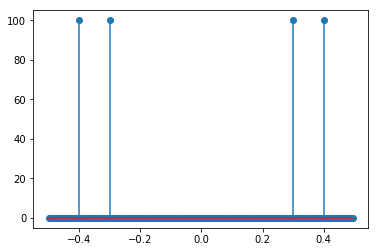

In [5]:
n=np.arange(0,2,0.01)
x= exp_couple(30) + exp_couple(40)
#x=np.cos(2*np.pi*20*n)
freq=np.fft.fftfreq(n.shape[-1])
plt.stem(freq,abs(np.fft.fft(x)))

###  MUSIC Exercise

In [97]:
fs=500 # Sampling rate
T=1 # Second
N=T*fs # Number of samples
K=3 # Three harmonics
f=np.array([20,100,200])
a=np.array([1,2,3])
n=np.arange(0,T,1/fs)
P = 20 #realizations
x=np.zeros((N,),dtype=np.complex128)

        

In [98]:
for p in range(P):
    for k in range(K):
        x+=a[k]*np.exp(1.j*2*np.pi*f[k]*n)
        break # delete this to generate 3 harmonics

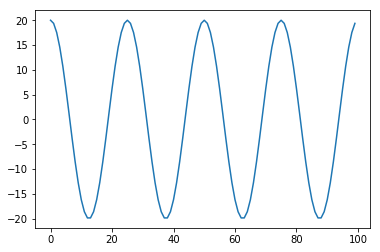

In [99]:
plt.plot(np.real(x[:100]))

In [100]:
y = x[:,np.newaxis] +np.random.randn(N,P)

In [102]:
# Estimate the covariance
R = y.dot(y.conj().T)

In [103]:
# Correlation of  signals ----> Empirical correlation was used
h=20
R=np.zeros((h,h),dtype=np.complex128)
for p in range(P):
    for n in range(h-1,N):
        chunk = np.zeros((h,1),dtype=np.complex128)
        for hi in range(h):
            chunk[hi]=y[n-hi,p]
        R+=chunk.dot(chunk.conj().T)

In [104]:
r=np.correlate(x, x,mode='same')[:20]

In [105]:
evalues,evecs=np.linalg.eig(R)

<Container object of 3 artists>

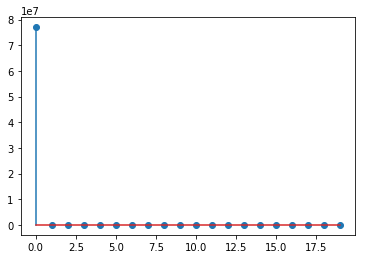

In [106]:
plt.stem(np.real(evalues))

In [107]:
np.linalg.matrix_rank(R)

20

In [108]:
Gnoise = evecs[:,3:] #Basis of noise subspace GN(N-K)
Gnoise.shape

(20, 17)

In [109]:
# Misuc Algorithm application
Q = 100
music = np.zeros((Q,),dtype=np.complex)
t = np.arange(h)
for q in range(Q):
    e = np.exp(-1j*2*np.pi*((q-1)/Q)*t)
    tmp = e.conj().T.dot(Gnoise.dot(Gnoise.conj().T.dot(e)))
    music[q] = (1/tmp)

<Container object of 3 artists>

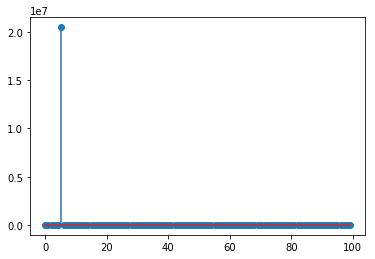

In [110]:
plt.stem(np.real(music))